# Part 1: Easy

You are building a syring pump in your hackspace practial. Though it is simple enough to do this by 'hand' or on excel, it is a good exercise to try our sklearn (scikit - learn). Given the voltage or current setting, you will measure flow rates. Take this data an build a calibration curve.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
X = np.array([0, 0.1, 0.5, 0.7, 0.9, 1.1, 3, 3.7]).reshape(-1,1)
y = np.array([5, 7, 8.8, 12, 15, 17.3, 22, 30]).reshape(-1,1)

In [2]:
reg = LinearRegression()
reg.fit(X, y)
print(reg.score(X, y), reg.coef_, reg.intercept_)

0.9259013483676294 [[5.91473765]] [7.24407793]


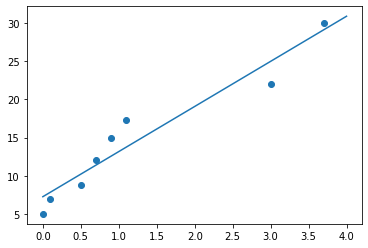

In [3]:
X_test = np.array([0,4]).reshape(-1,1)
y_test = reg.predict(X_test)
plt.scatter(X,y)
plt.plot(X_test,y_test)

# Part 2: Challenge

### Binary Classification: Predicting the mechanism of action (MOA) for polar and nonpolar narcotic compounds

Quantitative structure-activity relationships (QSARs) are the early incarnations of modern machine learning. Here we are looking to predict toxicity categories (MOAs) for a given structure based on known data. For example, see Table 7 from [Ivanciuc - Applications of Support Vector Machines in Chemistry](http://www.cbs.dtu.dk/courses/27623.algo/material/SVM/Ivanciuc_SVM_CCR_2007_23_291.pdf), where the energy of the **highest occupied molecular orbital** $EHOMO$,  **lowest unoccupied molecular orbital** $ELUMO$, and most negative partial charge on any non-hydrogen atom in the molecule **$Q^-$**

In [4]:
# confusion matrix
def conf_mat(y_pred, y_test, title):
    cm = confusion_matrix(y_pred,y_test)
    sns.heatmap(1*(cm-np.min(cm))/(np.max(cm)-np.min(cm)), annot=True, xticklabels=['class 1', 'class -1'], yticklabels=['TP', 'FP'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()
    
# roc plot
def roc_plot(clf, X_train, y_train, X_test, y_test, title):
    # get y score or target scors from the decision function
    #y_score = clf.fit(X_train, y_train).decision_function(X_test)
    y_score = clf.decision_function(X_test)
    
    # false positive and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    # area under the curve
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'model')
    plt.plot([0,1], [0,1], label='luck')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Charactersitic on {title}')
    plt.legend()
    plt.show()

    print("Area under the curve:", roc_auc)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# real data
df = pd.read_csv('toxicSVM.txt', sep='\t')
df.tail()

X = df[['EHOMO', 'ELUMO', 'Q"']].values
y = df[['Class']].values

print(X.shape,y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(X_train.shape, y_train.shape)

(20, 3) (20, 1)
(10, 3) (10, 1)


C:\Users\nebarlow\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


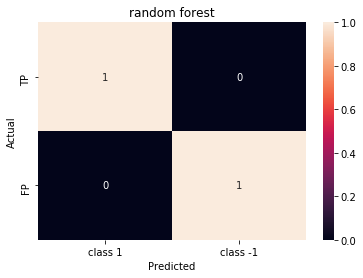

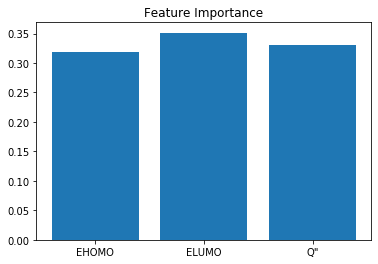

In [6]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)
conf_mat(y_pred,y_test, 'random forest')

plt.title('Feature Importance')
_ = plt.bar(['EHOMO', 'ELUMO', 'Q"'], clf.feature_importances_)